In [261]:
#illustrate_cytokines.R
#
#two tasks:

#task 1: draw cytokine condition significance heatmap.
#[1] get all sig cytokine list
#[2] merge into a single list
#[3] color code (up, down, not sig)

#task 2: draw heatmap based on 'abundances'. However, will need context of conditions.

library(pheatmap)
library(ggplot2)

In [262]:
change_dbl_to_category <- function(x) {
  ifelse(x > 0, "UP", ifelse(x < 0, "DOWN", "None"))
}

In [263]:
#Task 1:

#buffer
input_file = "../../../analysis/statistics/cytokine_boxplots/all_adj_cytokine_df_v2.tsv"
input_df = read.csv(input_file, sep="\t", row.names=1)

acpa_values <- as.numeric(input_df[1, ])
sorted_order <- order(acpa_values)
input_df <- input_df[ , sorted_order]

cytokine_annotation_file = "../../../analysis/statistics/cytokine_boxplots/cytokine_annoation.tsv"
cytokine_annotation_df = read.csv(cytokine_annotation_file, sep="\t")
cytokine_list = cytokine_annotation_df[,1]

sample_info_df = input_df[rownames(input_df) == "acpa", ]
sample_info_df = t(sample_info_df)

input_df <- input_df[rownames(input_df) %in% cytokine_list, ]
input_df <- input_df[match(cytokine_list, rownames(input_df)), ]

In [264]:
input_df

,X1402101782,X1401405787,X1305800706,X1431803035,X1315600833,X1321207870,X1500903736,X1431601798,X1315408885,X1411304493,⋯,X1611703051,X1501402826,X20014026031,X1507802062,X20268005789,X19311028306,X1510603533,X19066026481,X1434100114,X1513502608
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CCL15_14109-15,1246.6,1085.1,1915.9,1866.5,1102.6,1023.2,991.8,961.7,1104.5,1500.9,⋯,2102.9,1598.7,3144.3,1223.4,1115.6,974.6,1230.6,1007.0,1218.5,1090.3
CCL16_4913-78,15596.8,12592.8,20100.3,7761.7,19597.0,11856.6,16142.0,19296.9,17115.4,15675.0,⋯,15510.6,10562.1,8216.6,9627.4,15390.3,12450.9,23268.7,8553.2,15700.4,11710.2
CCL19_4922-13,260.8,313.5,313.4,269.0,291.3,266.8,243.0,256.9,231.9,257.1,⋯,232.6,232.5,274.8,337.2,332.3,261.4,257.1,285.1,225.1,295.3
CCL7_22969-12,214.4,212.0,216.9,218.3,196.9,236.7,240.7,233.1,320.0,196.5,⋯,214.2,311.9,212.3,203.8,377.5,242.7,211.6,201.6,207.3,368.2
CSF1_3738-54,1429.5,1150.2,1276.1,1362.9,1143.7,1092.4,1189.7,1465.1,1169.1,1285.4,⋯,1248.4,1521.0,1203.1,1883.3,1340.3,1085.0,1259.5,1071.9,1348.8,1241.9
CSF2_4697-59,205.1,214.3,228.5,205.4,199.5,420.1,186.3,202.0,243.4,224.4,⋯,256.9,220.8,267.8,176.6,360.6,266.1,174.5,265.9,292.1,219.5
CXCL11_3038-9,1790.2,1844.6,4378.0,2024.5,1684.2,4141.9,2564.0,6785.0,2512.6,3148.4,⋯,3418.6,6612.4,1943.4,1134.3,6905.8,1555.8,3078.1,2448.5,2346.3,3682.3
CXCL13_3487-32,311.2,477.6,839.5,418.9,372.5,458.5,398.3,432.0,504.6,389.7,⋯,385.1,464.9,710.5,259.7,902.4,385.5,471.4,357.5,283.1,696.0
CXCL17_9495-10,414.4,415.4,564.0,434.2,401.1,451.0,431.1,440.9,410.6,425.4,⋯,446.6,420.7,443.5,413.9,412.4,464.9,467.6,440.9,420.6,450.7


In [265]:
annotation_df <- data.frame(
    cytokine = cytokine_list,   # Use cytokine_list as row names
    cohenD_cVSneg = NA,             
    cohenD_cVSpos = NA,    
    cohenD_negVSpos = NA
)
rownames(annotation_df) = annotation_df$cytokine

#get input 
condition_list <- c("cVSneg","cVSpos","negVSpos")
for (condition in condition_list){
    print (condition)
    data_file = paste("../../../analysis/statistics/linear_model/differential_abundance_logit/proteomics.", condition, ".tsv", sep="")
    data_df = read.csv(data_file, sep="\t")

    filtered_df <- data_df[data_df[, 1] %in% cytokine_list, ]
    row.names(filtered_df) <- NULL

    for (i in length(filtered_df)){
        for (i in 1:nrow(filtered_df)){
        
            cytokine_name <- filtered_df[i,1]
            pval <- filtered_df$all_adj_pval[i]
            cohenD <- filtered_df$cohenD[i]
            if (pval < 0.05 && abs(cohenD) > 0.2){

                if (condition == "cVSneg"){
                    annotation_df$cohenD_cVSneg[annotation_df$cytokine == cytokine_name] <- cohenD
                }
                if (condition == "cVSpos"){
                    annotation_df$cohenD_cVSpos[annotation_df$cytokine == cytokine_name] <- cohenD
                }                
                if (condition == "negVSpos"){
                    annotation_df$cohenD_negVSpos[annotation_df$cytokine == cytokine_name] <- cohenD
                }
                
            } else{
                if (condition == "cVSneg"){
                    annotation_df$cohenD_cVSneg[annotation_df$cytokine == cytokine_name] <- 0
                }
                if (condition == "cVSpos"){
                    annotation_df$cohenD_cVSpos[annotation_df$cytokine == cytokine_name] <- 0
                }                
                if (condition == "negVSpos"){
                    annotation_df$cohenD_negVSpos[annotation_df$cytokine == cytokine_name] <- 0
                }
            }
        }    
    }
}

columns_to_update <- c("cohenD_cVSneg", "cohenD_cVSpos", "cohenD_negVSpos")
annotation_df[columns_to_update] <- lapply(annotation_df[columns_to_update], change_dbl_to_category)
annotation_df = subset(annotation_df, select= -cytokine)

[1] "cVSneg"
[1] "cVSpos"
[1] "negVSpos"


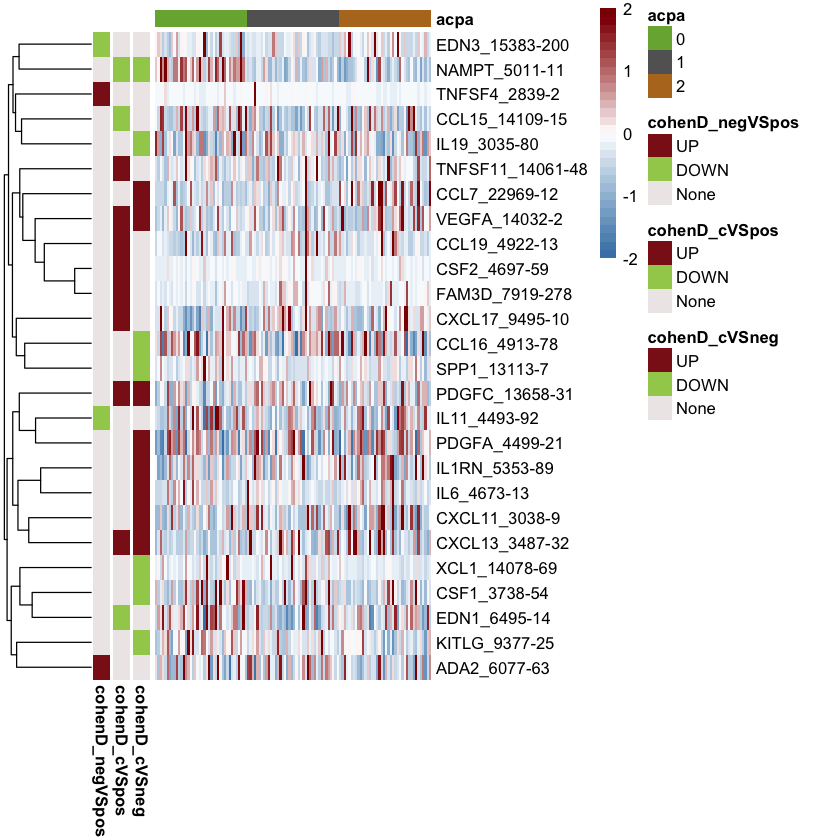

In [287]:
ann_colors <- list(
    cohenD_cVSneg = c('UP' = "firebrick4", 'DOWN' = "darkolivegreen3", 'None' = 'snow2'),
    cohenD_cVSpos = c('UP' = "firebrick4", 'DOWN' = "darkolivegreen3", 'None' = 'snow2'),
    cohenD_negVSpos = c('UP' = "firebrick4", 'DOWN' = "darkolivegreen3", 'None' = 'snow2'),
    acpa = c("0" = "#78AF3F", "1" = "#636363", "2" = "#B57623")
)

my_colors <- colorRampPalette(c("steelblue", "white", "red4"))(30)
breaks <- seq(-2, 2, length.out = 31)  # 51 for 50 intervals between colors

# Convert the matrix to a data frame
sample_info_df <- as.data.frame(sample_info_df)

# Optional: Set the row names using the first column (if appropriate)
rownames(sample_info_df) <- rownames(sample_info_df)
sample_info_df$acpa <- as.factor(sample_info_df$acpa)

# pdf("../../../analysis/statistics/cytokine_boxplots/all_adj_cytokine_df.pdf", width = 20, height = 10)
pheatmap(input_df,
        scale="row",
        cluster_cols = FALSE,
        cluster_rows = TRUE,
        annotation_row = annotation_df,
        annotation_colors = ann_colors,
        annotation_col = sample_info_df,
        color = my_colors, 
        breaks = breaks,
        # cellwidth = 8,
        # cellheight = 20,
        show_colnames = FALSE,  # Remove column labels
        )
# print (gt)
# dev.off()

# pdf("../../../analysis/statistics/cytokine_boxplots/all_adj_cytokine_df.pdf", width = 20, height = 10)
# gt <- pheatmap(input_df,
#          scale="row",
#          cluster_cols = FALSE,
#          cluster_rows = FALSE,
#          annotation_row = annotation_df,
#          annotation_colors = ann_colors,
#          annotation_col = sample_info_df,
#          color = my_colors, 
#          breaks = breaks,
#         cellwidth = 8,
#         cellheight = 20,
#          show_colnames = FALSE,  # Remove column labels
#         )$gtable
# ggsave("../../../analysis/statistics/cytokine_boxplots/all_adj_cytokine_df.pdf", plot=gt, width = 20, height = 10)